In [ ]:
%reset -f

In [187]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

X dimensions: (100, 2)
y dimensions: (100, 1)


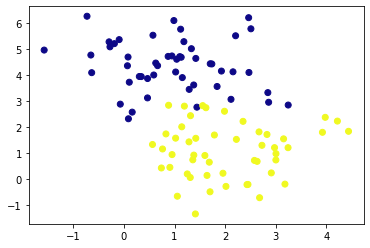

In [188]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print(f'X dimensions: {X.shape}')
print(f'y dimensions: {y.shape}')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='plasma')
plt.show()

In [189]:
def init(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return W, b


In [190]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A


In [191]:
def log_loss(A, y):
    m = y.shape[0]
    epsilon = 1e-15
    return -(1 / m) * np.sum(y * np.log(A + epsilon) + (1 - y) * np.log(1 - A + epsilon))


In [192]:
def gradients(A, X, y):
    m = y.shape[0]
    dW = (1 / m) * np.dot(X.T, A - y)
    db = (1 / m) * np.sum(A - y)
    return dW, db


In [193]:
def update(dW, db, W, b, learning_rate: int):
    W -= learning_rate * dW
    b -= learning_rate * db
    return W, b


In [194]:
def predict(X, W, b):
  A = model(X, W, b)
  return A >= 0.5

In [195]:
from tqdm import tqdm

In [196]:
def perceptron(X_train, y_train, X_test, y_test, learning_rate: int = 0.1, n_iter: int = 100):
    W, b = init(X_train)

    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []

    for i in tqdm(range(n_iter)):
        A = model(X_train, W, b)

        if i % 10 == 0:
            train_loss.append(log_loss(A, y_train))
            y_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))

            A_test = model(X_test, W, b)
            test_loss.append(log_loss(A_test, y_test))
            y_pred = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred))
            
        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)

    plt.figure(figsize=(16, 16))
    plt.subplot(2, 2, 1)
    plt.title('Log loss')
    plt.plot(train_loss, c='r', label='train')
    plt.plot(test_loss, c='orange', label='test')
    plt.legend()
    plt.subplot(2, 2, 2)
    plt.title('Accuracy')
    plt.plot(train_acc, c='g', label='train')
    plt.plot(test_acc, c='lightgreen', label='test')
    plt.legend()
    plt.show()

    return W, b


100%|██████████| 100/100 [00:00<00:00, 16487.04it/s]


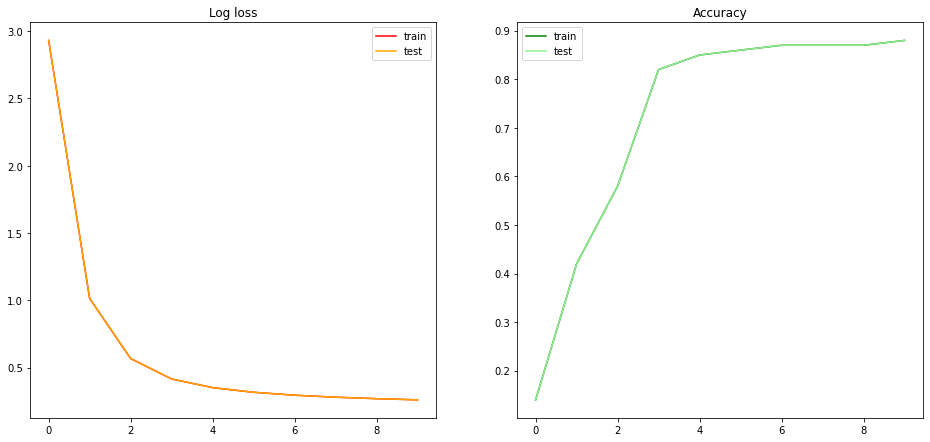

In [197]:
W, b = perceptron(X, y, X, y)


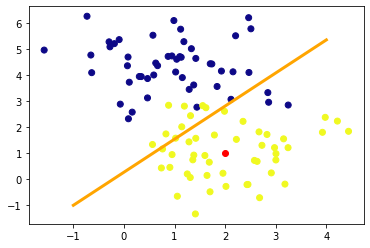

In [198]:
new_plant = np.array([2, 1])

x0 = np.linspace(-1, 4, y.shape[0])
x1 = - (W[0] * x0 + b) / W[1]

plt.plot(x0, x1, c='orange', lw=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='plasma')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.show()

In [199]:
predict(new_plant, W, b)

array([ True])

## Cat vs Dog

In [200]:
from utils import *

In [201]:
X_train, y_train, X_test, y_test = load_data()

In [202]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500]))


In [203]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100]))


/home/apinotfound/.virtualenvs/deep-learning-learning/lib/python3.8/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


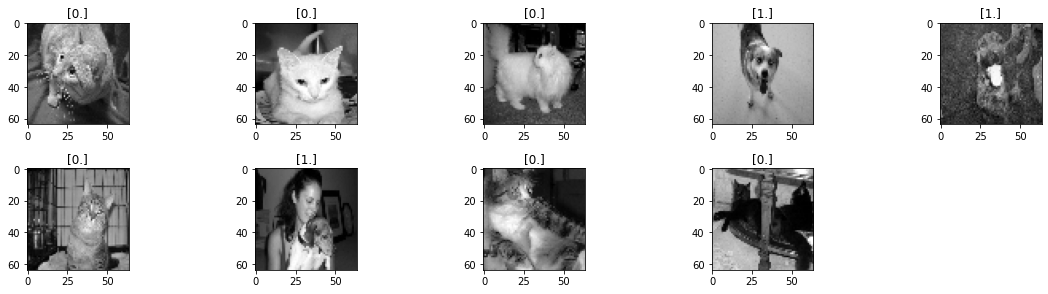

In [204]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [205]:
# TODO
# * 1. Normaliser le train_set et le test_set (0-255 -> 0-1)
# * 2. flatten() les variables du train_set et du test_set (64x64 -> 4096)
# * 3. Entrainer le modele sur le train_set (tracer la courbe d'apprentissage, trouver les bons hyper-params)
# * (si vous rencontrez un probleme avec le log_loss, utiliser la fonction de sklearn a la place !)
# * 4. Évaluer le modele sur le test_set (tracer également la courbe de Loss pour le test_set)
# * 5. Partager vos conclusions dans les commentaires !

In [206]:
from sklearn.preprocessing import MinMaxScaler

In [207]:
X_train = np.array([X_train[i].flatten() for i in range(X_train.shape[0])])
X_test = np.array([X_test[i].flatten() for i in range(X_test.shape[0])])

In [208]:
scaler = MinMaxScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

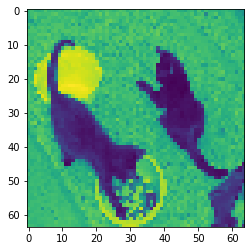

In [209]:
plt.imshow(X_train_transformed[0].reshape(64, 64))

100%|██████████| 10000/10000 [00:48<00:00, 205.22it/s]


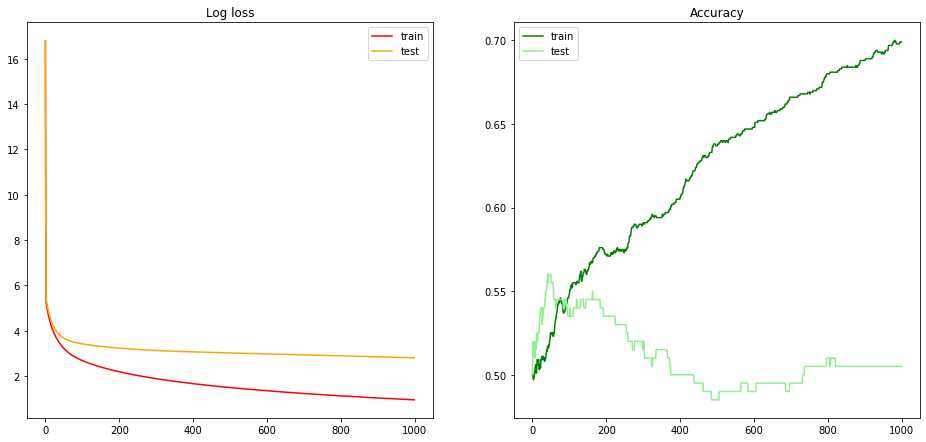

In [210]:
W, b = perceptron(X_train_transformed, y_train, X_test_transformed, y_test, learning_rate=0.01, n_iter=10000)

In [211]:
y_pred = predict(X_test_transformed, W, b)
accuracy_score(y_test, y_pred)

0.505